In [1]:
from dlem.util import convert_diags_to_full_contact
from dlem import util
from dlem import load_model, load_reader
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [2]:
import torch

In [3]:
BATCH_SIZE = 4 

In [4]:
GENOME_FILE = "/data/genomes/human/Homo_sapiens/UCSC/hg38/Sequence/WholeGenomeFasta/genome.fa"

In [5]:
data = load_reader("datareader")("../.data/dlem_training")

In [6]:
data[0]

(array([ 0.11081386, -0.068368  ,  0.00134587, ..., -0.8754434 ,
        -0.17893039,  0.06875594], dtype=float32),
 array([[ 0.03063522, -0.06403665,  0.5185543 , -0.22209054, -0.57076603,
         -0.7941936 ,  0.26860434,  0.5717285 ,  2.1184335 ,  0.13093318,
          0.43501312,  2.870391  ,  1.729502  , -0.2692069 ,  0.22000404,
         -0.5364617 , -0.5541118 ,  0.76770383,  0.09801213, -1.0549153 ,
         -0.40049288, -0.9130754 , -0.6482005 , -0.43665624, -0.6015728 ,
         -0.47894594, -0.22032519, -0.2429872 , -0.7986259 , -0.6772487 ,
          0.11958733, -1.3452097 , -0.2920698 , -1.5006065 ,  0.48239243,
          0.2984207 ,  0.06204036, -1.0760121 , -0.7783395 , -0.5646162 ,
         -0.1096722 ,  0.31163907, -1.0182756 , -0.5119262 , -1.2138633 ,
         -0.9637169 , -0.9348285 , -0.8094682 , -1.0253421 , -0.8634209 ,
          0.58619833,  0.27906114, -0.8626251 , -0.1574729 , -0.7162269 ,
          0.03709753,  0.03108476, -1.0662478 , -0.52623755, -0.517698

In [7]:
model = load_model("encodetocontact_1d_out")(data.patch_dim, data.feature_dim, data.start_diag, data.stop_diag)

In [8]:
index_diagonal = util.diag_index_for_mat(data.patch_dim, data.start_diag, data.stop_diag)

In [9]:
mat = convert_diags_to_full_contact(data[0][0], data.start_diag, data.stop_diag)

In [10]:
data[0][0].shape, data[0][1].shape

((6083,), (4, 120))

In [11]:
test_fold = 'fold4'
val_fold = 'fold5'

In [26]:
convert_diags_to_full_contact(data[-i][0], data.start_diag, data.stop_diag).shape

(120, 120)

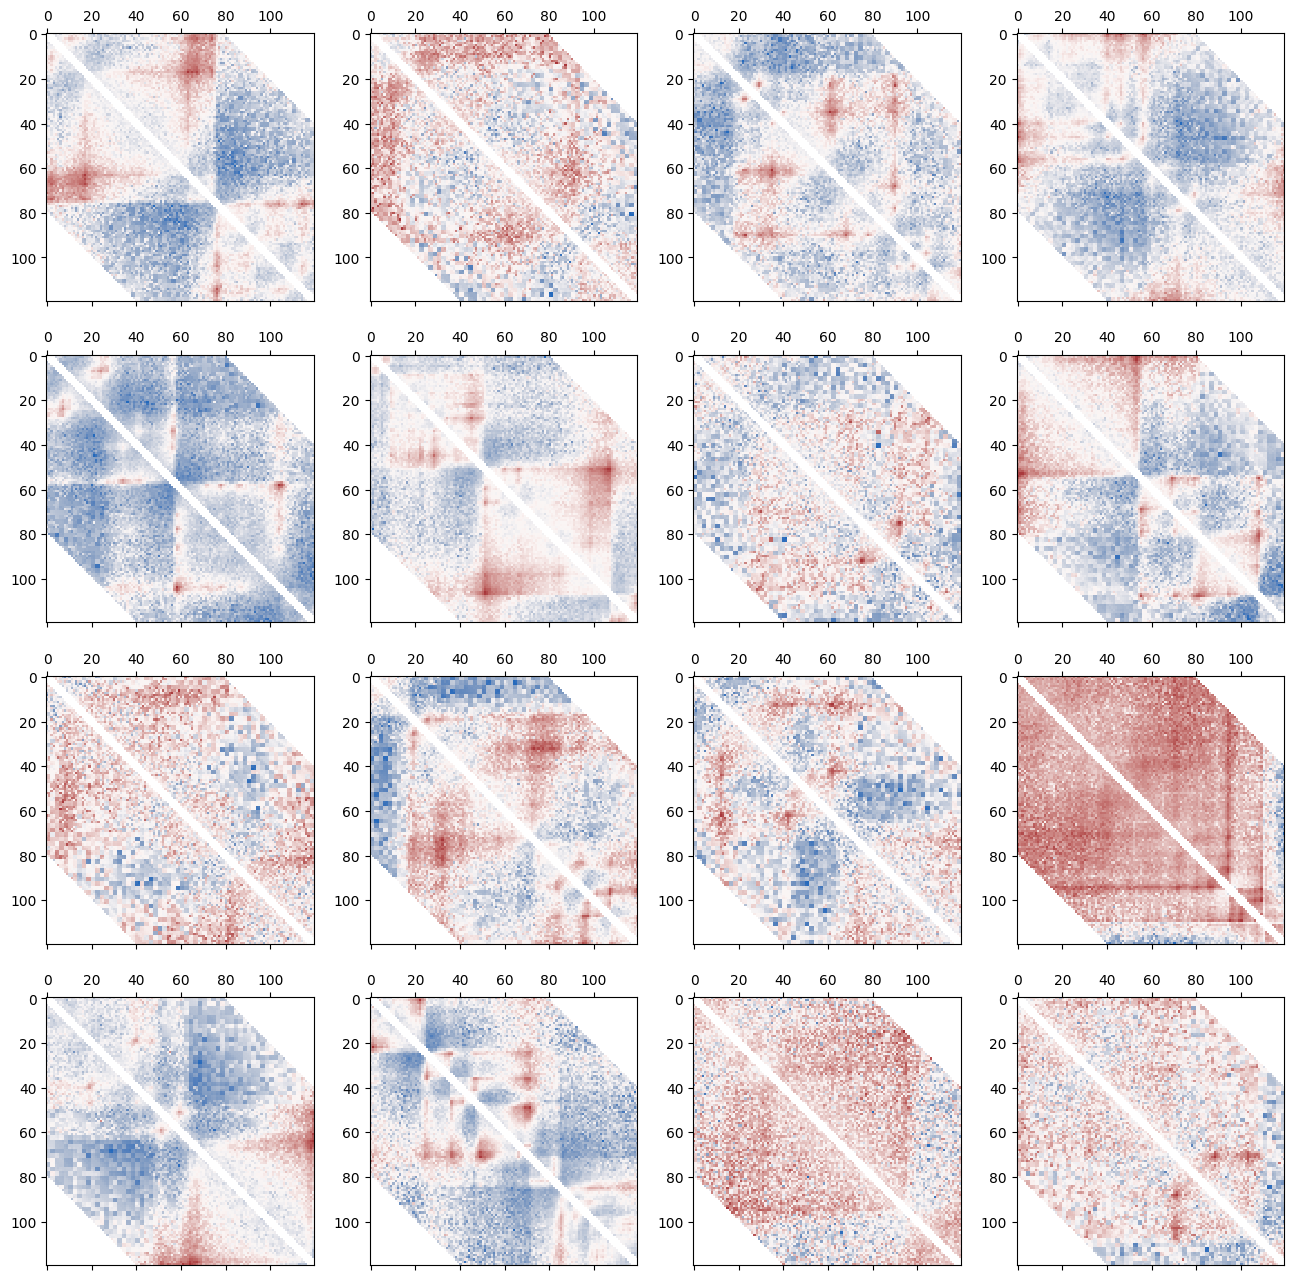

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
for i, ax in enumerate(axes.flat):
    ax.matshow(convert_diags_to_full_contact(data[-i][0], data.start_diag, data.stop_diag), cmap="vlag") 

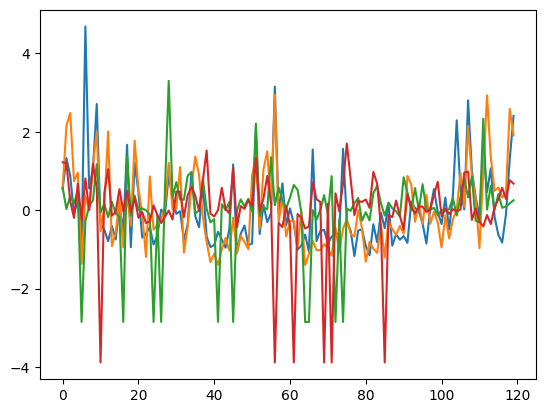

In [13]:
plt.plot(data[-5][1].T)

In [14]:
data.data_folds

array(['fold0', 'fold0', 'fold0', ..., 'fold7', 'fold7', 'fold7'],
      dtype=object)

In [15]:
data_test = torch.utils.data.Subset(data, np.where(data.data_folds == test_fold)[0])
data_val = torch.utils.data.Subset(data, np.where(data.data_folds == val_fold)[0])
data_train = torch.utils.data.Subset(data, np.where(np.logical_and(data.data_folds != val_fold,
                                                                   data.data_folds != test_fold))[0])

In [16]:
dataloader_test = torch.utils.data.DataLoader(data_test, batch_size = BATCH_SIZE, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(data_val, batch_size = BATCH_SIZE, shuffle=True)
dataloader_train = torch.utils.data.DataLoader(data_train, batch_size = BATCH_SIZE, shuffle=True)

In [17]:
batch = next(iter(dataloader_test))

In [18]:
batch[1].dtype

torch.float32

In [19]:
len(index_diagonal(6))

114

In [20]:
batch[1].shape

torch.Size([4, 4, 120])

In [21]:
model(batch[1], torch.exp(batch[0][:, index_diagonal(5)]), 5).flatten().shape

torch.Size([456])

In [22]:
util.mat_corr(model(batch[1], torch.exp(batch[0][:, index_diagonal(5)]), 5), batch[0][:,index_diagonal(6)])

tensor(0.6554, grad_fn=<SelectBackward0>)

In [23]:
out = model.contact_map_prediction(batch[1],
                             torch.from_numpy(np.ones((batch[1].shape[0], data.patch_dim), dtype=np.float32) * data.patch_dim))

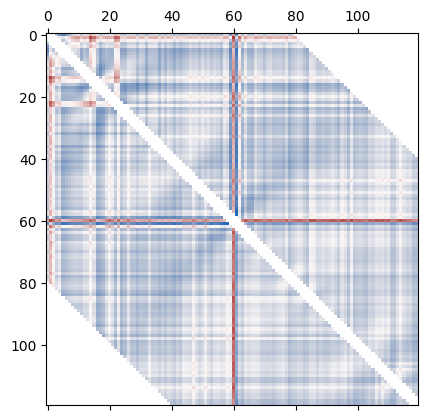

In [24]:
plt.matshow(convert_diags_to_full_contact(out[0], data.start_diag, data.stop_diag), cmap="vlag") 

In [25]:
batch[0]

tensor([[-5.6849e-02, -5.4263e-01, -5.5474e-01,  ...,  4.4084e-01,
          4.3531e-01,  4.4110e-01],
        [-1.6621e-01, -3.1564e-01, -2.4564e-01,  ..., -6.6717e-01,
         -1.0123e+00, -3.9940e-01],
        [-9.9305e-03, -1.2520e-03,  9.8803e-03,  ..., -2.2885e-01,
         -2.2298e-01, -1.3020e-01],
        [ 9.3525e-02, -2.8289e-01, -1.1643e-02,  ...,  5.4755e-01,
          1.2951e+00,  2.0857e-01]])